<a href="https://colab.research.google.com/github/yaarikk21/DA-course/blob/main/hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

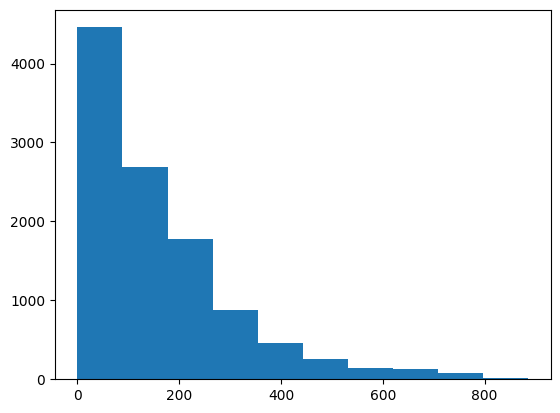

In [42]:
plt.hist(df['registered']);

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

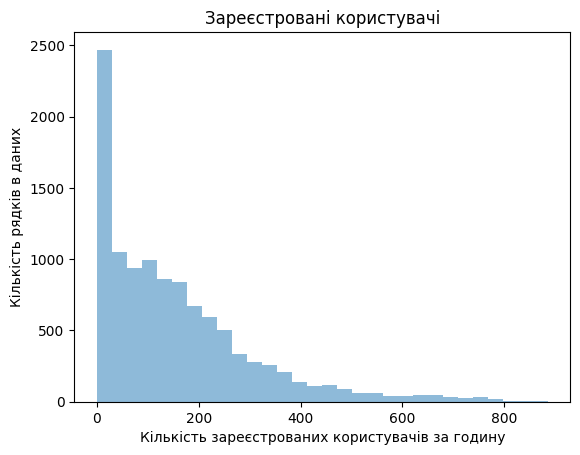

In [43]:
plt.hist(df['registered'], bins=30, alpha=0.5)

plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в даних')
plt.title('Зареєстровані користувачі');

В нас тут вказано кількість користувачів зареєстрованих за годину і тут все зрозуміло, бо найбільше випадків коли за годину взагалі ніхто не реєструвався, а найменьше - коли за годину реєструвалось 700-800 користувачів. Все логічно, бо це дуже важко зробити так, щоб кожну годину в тебе з'являлось 800 нових користувачів сервісу і таке може бути, але дуже рідко як це показує графік. 0 користувачів в годину - саме цей стовбчик є найбільшим бо зрозуміло що набагато частіше будуть години в які взагалі ніхто не реєструється (це як мінімум той час, коли людина спить).

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [44]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [45]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [46]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

Text(0.5, 0, 'day of week')

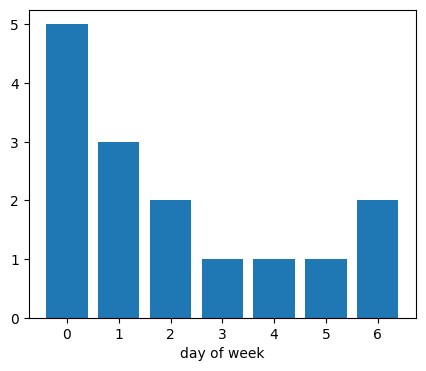

In [47]:
zero_registered = df[df['registered'] == 0]
zero_counts_by_day = zero_registered.groupby('dayofweek').size()

plt.figure(figsize=(5,4))
plt.bar(zero_counts_by_day.index, zero_counts_by_day.values);

plt.xlabel('day of week')

# тут трохи не можу зрозуміти чому в мене ці смужки трохи ширше ніж в прикладі, це від чогось залежить чи це треа задавати окремою командою?
# це нічого не міняє по факту, але на майбутнє може бути корисним

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

1. Ясно, Мало хмарно, частково хмарно
2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман

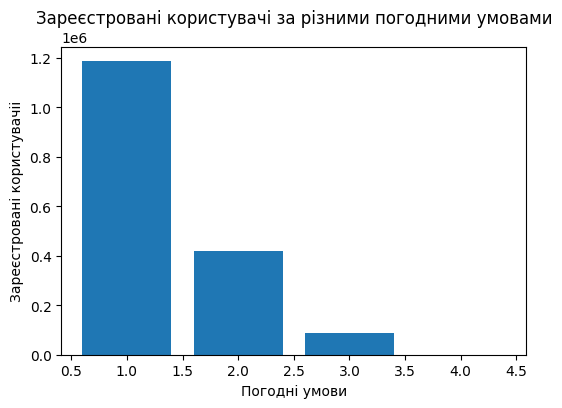

In [48]:
registered_by_weather = df.groupby('weather')['registered'].sum()

plt.figure(figsize=(6,4))
plt.bar(registered_by_weather.index, registered_by_weather.values)

plt.xlabel('Погодні умови')
plt.ylabel('Зареєстровані користувачіі')
plt.title('Зареєстровані користувачі за різними погодними умовами');

так, цей графік повністю відображає реальність, бачимо що в хорошу погоду найбільша кількість користувачів, в той час як в дуже погані умови для їзди на велосипеді ми бачимо що взагалі немає зареєстрованих користувачів. Якщо кратко, то чим менш сприятливі умови для їзди на велосипеді - тим меньше користувачів.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

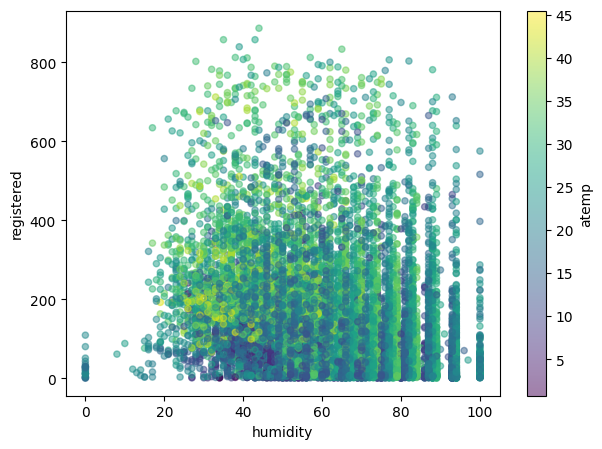

In [50]:
df.plot.scatter(x='humidity', y='registered', c='atemp', colormap='viridis', alpha=0.5, figsize=(7,5));

Тут бачимо що найбільша кількість зареєстрованих користувачів тоді, коли вологість знаходиться діапазоні адекватних значень (20-80). Коли меньше 20, то зазвчиай на вулиці дуже сухе повітря в такі дні дуже жарко і більшість людей вирішить залишитися вдома. Коли 80+ то користувачів більше ніж в 0-20, але значно меньше ніж 20-80. Це також можна пояснити тим, що занадто висока вологість повітря не є дуже комфортною, може бути дощ, і в таку погоду великий шанс захворіти, тому більшість людей також залишаться дома.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)